<a href="https://colab.research.google.com/github/hamzajb95/CE888/blob/main/Lab4/Lab4_Reccomender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
!wget 'http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip'


# Unzipping Data
with zipfile.ZipFile(f'jester_dataset_1_1.zip',"r") as zip_ref:
  zip_ref.extractall()

--2021-05-05 13:24:35--  http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip
Resolving eigentaste.berkeley.edu (eigentaste.berkeley.edu)... 128.32.192.72
Connecting to eigentaste.berkeley.edu (eigentaste.berkeley.edu)|128.32.192.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4171628 (4.0M) [application/zip]
Saving to: ‘jester_dataset_1_1.zip’

jester_dataset_1_1. 100%[===================>]   3.98M  9.78MB/s    in 0.4s    

2021-05-05 13:24:36 (9.78 MB/s) - ‘jester_dataset_1_1.zip’ saved [4171628/4171628]



In [3]:
data = pd.read_excel('/content/jester-data-1.xls', header=None, na_values=99)
data.drop(columns=0, inplace=True)
data.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [15]:
data.shape

(24983, 100)

In [4]:
#Finding Average Jokes Rating

score = []
for i in data.columns:
  score.append(np.nanmean(data.loc[:,i]))

In [5]:
#The best and worst jokes are:
rdict = {'JokeID':data.columns, 'Avg_Rating':score}
rating = pd.DataFrame.from_dict(rdict)
rating.sort_values(by='Avg_Rating', ascending=False, inplace=True)
print(f'Best Joke:\n {rating.head(1)}')
print(f'Worst Joke:\n {rating.tail(1)}')

Best Joke:
     JokeID  Avg_Rating
49      50    3.665085
Worst Joke:
     JokeID  Avg_Rating
57      58    -3.83388


In [17]:
# Rating for Joke 10 by 18109

data.iloc[18290,84]

-4.37

In [7]:
#Turning data into numpy array
arr = data.values
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [8]:
# Helper Function Setup

def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with np.NaN's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=np.NaN)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [9]:
new_arr, idx = replace(arr, 0.1)

In [10]:
# Creating latent factors

n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))
latent_item_features

array([[0.07116696, 0.23511663],
       [0.17382731, 0.41246761],
       [0.97040236, 0.73199095],
       [0.49187845, 0.85478988],
       [0.3996862 , 0.77770331],
       [0.6197134 , 0.93607742],
       [0.56343017, 0.42159092],
       [0.598622  , 0.76733302],
       [0.28124153, 0.75035343],
       [0.61420527, 0.29212105],
       [0.48547382, 0.62744677],
       [0.34712213, 0.23281402],
       [0.47981139, 0.79320611],
       [0.09796046, 0.33804897],
       [0.04867598, 0.07093437],
       [0.63586913, 0.75724218],
       [0.01652514, 0.87412215],
       [0.41036993, 0.3886752 ],
       [0.27134921, 0.54443646],
       [0.24683322, 0.94598896],
       [0.00723838, 0.14372287],
       [0.92082867, 0.7711426 ],
       [0.07061663, 0.26396711],
       [0.37660148, 0.8375773 ],
       [0.38563311, 0.43159689],
       [0.91881287, 0.52919785],
       [0.45998789, 0.32428061],
       [0.20318816, 0.48032757],
       [0.85911397, 0.37334759],
       [0.12472654, 0.58744152],
       [0.

In [11]:
latent_user_preferences

array([[0.40213526, 0.27383155],
       [0.85069702, 0.56499006],
       [0.72866212, 0.61814324],
       ...,
       [0.69630471, 0.38377541],
       [0.24193866, 0.67394014],
       [0.63436943, 0.99299043]])

In [12]:
  def predict_rating(user_id, item_id):
      """ Predict a rating given a user_id and an item_id.
      """
      user_preference = latent_user_preferences[user_id]
      item_preference = latent_item_features[item_id]
      return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history


Iteration 0/100:	MSE=17.076426
Iteration 10/100:	MSE=17.073360
Iteration 20/100:	MSE=17.072420
Iteration 30/100:	MSE=17.072358
Iteration 40/100:	MSE=17.072644
Iteration 50/100:	MSE=17.073071
Iteration 60/100:	MSE=17.073554
Iteration 70/100:	MSE=17.074062
Iteration 80/100:	MSE=17.074581
Iteration 90/100:	MSE=17.075109


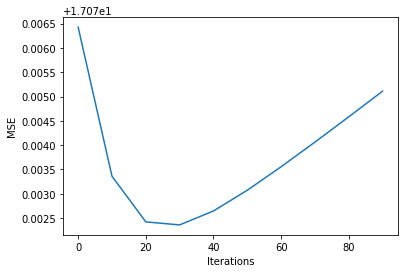

In [14]:
# Calculating MSE

num_iter = 100
hist = sgd(num_iter)
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
# Making Prediction for test set

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

In [ ]:
# Creating DataFrame for Comparison

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [ ]:
# Data Comparison 

comparison_data

In [ ]:
# Data Comparison CSV

comparison_data.to_csv('rating_comparison.csv')